In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


# Dimensionality Reduction

*The Curse of Dimensionality* imagine if you need to train a model that uses thosands or millions of feature for each instance. This can make training very slow but also very difficult to find a good solution. 

A example is the MNIST dataset, the pixel on the border are almost always white. So we can remove them because they do not help us with the training. However we are removing information. There is a trade off for speed with information loss which might result in a slightly worse model. 

The curse of dimensionality is when each training distance is so far from another due to the high dimensions of space. If you have a dataset with 1 million feature and 2 million instances. It is unlikely that instance 1 will be close to instance 200,000. 

This means there is a great chance of overfitting. 

## Main Approaches for Dimensinality Reduction

### Projection

Projection is when we tak eevery training instnace and we project it in another dimension. Like a 3D dataset and move it to a 2D. Why would we do this well just like the MNIST dataset we know that not all features are important. 

Lets see the below graph as a way to represent this

<img src="images/3d_2d.png"/> </img>

We can see we take a 3D images but select specific features that are important to us and predict. Notice how we do not select any instances in the white area since they are not useful points.

### Manifold Learning

This is when we seek to understand the a 2D dataset even when it is contorted into a 3D dataset. It is a 2D shape that can be twisted into a higher dimensional shape. 

<img src="images/swiss_roll.png"/> </img>

This relies on the Manifold assumption that is also called manifold hypothesis  which states that most real wold high dimensional datasets lie close to a much lower dimensional manifold. This is often accompanied by a another assumption that the task at hand is often simpler if expressed in the lower diimensional space of the manifold. 

## Principal Component Analysis (PCA)

One of the most popular algorithms for dimensinality reduction algorithm. First it identities the hyperplane that lis closest to the data and then it projecs the data onto it. 

In one sentence it identifies the hyperplane that lies cloest to the data and then it projects the data onto it.

The first thing that needs to happen is picking the right hyperplane. We usually want to pick up a plane with the maximum variance as shown on the figure below:

<img src="images/pca_maximum_variance.jpeg "/></img>

Notice how we select the PC1 because it has the maximum variance or range of different values. 

The ith axis is the ith principal component of the data. The third line is usually the axis orthogonal to that plane. 

One way to find the components of a traiing set is Singular Value Decomposition (SVD). 

What SVD does is decompose the training set matrix X into the matrix mutlicplication of 3 matrices. Where Vt contains the unit vectors that defin ehe principal components that we are looking for. 

In [2]:
#Building a 3D dataset
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
#SVD
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

What we are doing above is making sure we center the line. But without changinging the relative points. This video has a great explanation

https://www.youtube.com/watch?v=FgakZw6K1QQ&ab_channel=StatQuestwithJoshStarmer



In [4]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

In [8]:
X2D_using_svd

array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852],
       [-0.79710027,  0.26718188],
       [-0.55173939,  0.65062721],
       [ 1.41612959,  0.16567641],
       [ 0.40776059, -0.46053322],
       [ 0.85209856, -0.40516935],
       [-0.46269946,  0.61952736],
       [ 1.2826692 ,  0.41018903],
       [ 1.37468032,  0.03618608],
       [-0.96941594,  0.10932241],
       [-0.97219266,  0.14390464],
       [-1.05216924,  0.07740862],
       [-0.92770444, -0.22364286],
       [-0.01473543, -0.4153169 ],
       [-0.47010859, -0.46920058],
       [-0.87761843, -0.08515546],
       [ 0.38973612, -0.45189716],
       [-0.96989867,  0.19819051],
       [-0.93689997, -0.09307933],
       [-0.81304146, -0.26096051],
       [-0.41368569, -0.42009096],
       [ 1.2830484 , -0.02603822],
       [-0.95210787,  0.23163682],
       [-0.2005476 , -0.49130242],
       [ 0.33988682,

## Using Scikit-Learn

SKlearn has the ability to use SVD decomposition to implement PCA. The following code will reduce the dataset down to two dimensions and it takes care of centering the data. 

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [11]:
X2D

array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852],
       [-0.79710027,  0.26718188],
       [-0.55173939,  0.65062721],
       [ 1.41612959,  0.16567641],
       [ 0.40776059, -0.46053322],
       [ 0.85209856, -0.40516935],
       [-0.46269946,  0.61952736],
       [ 1.2826692 ,  0.41018903],
       [ 1.37468032,  0.03618608],
       [-0.96941594,  0.10932241],
       [-0.97219266,  0.14390464],
       [-1.05216924,  0.07740862],
       [-0.92770444, -0.22364286],
       [-0.01473543, -0.4153169 ],
       [-0.47010859, -0.46920058],
       [-0.87761843, -0.08515546],
       [ 0.38973612, -0.45189716],
       [-0.96989867,  0.19819051],
       [-0.93689997, -0.09307933],
       [-0.81304146, -0.26096051],
       [-0.41368569, -0.42009096],
       [ 1.2830484 , -0.02603822],
       [-0.95210787,  0.23163682],
       [-0.2005476 , -0.49130242],
       [ 0.33988682,

In [12]:
#Printing out explained variance ratio
pca.explained_variance_ratio_

array([0.85406025, 0.13622918])

What the above tell us is that 85.4% of the dataset's variance lies along the first PC and 13.6% lies along the second PC. The remainder lies on the third PC which probably has little information. 

## Choosing the Right Number of Dimensions

In [14]:
from sklearn.datasets import fetch_openml

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [17]:
X = mnist['data']
y = mnist['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [20]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95 ) + 1

What the above code is doing is getting the 95% of the data by getting the minimum number of dimensions. 

In [21]:
d

154

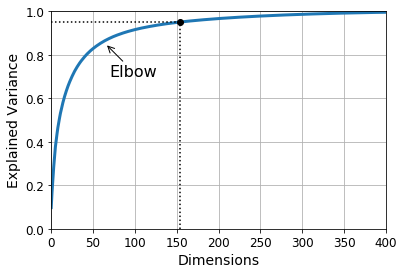

In [22]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

It seems that the best range is roughly at 82% to 95%. So going down to 100 dimensions will not cost that much data loss. 